/var/folders/r_/bq4swdms3vj5wr80yf1vm4nh0000gn/T/ipykernel_3337/686184282.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['powerlabel'] = train_df.apply(lambda x : 2*x['crack']+1*x['inactive'],axis=1)


<AxesSubplot:>

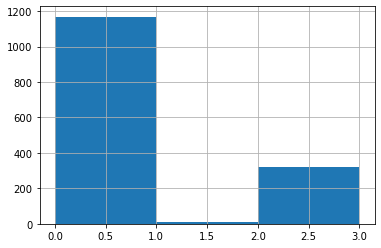

In [41]:
import torch as t
from data import ChallengeDataset
from trainer import Trainer
from matplotlib import pyplot as plt
import numpy as np
import model
from torch import nn
import pandas as pd
import torchvision as tv

from sklearn.model_selection import train_test_split

# load the data from the csv file and perform a train-test-split
# this can be accomplished using the already imported pandas and sklearn.model_selection modules
data = pd.read_csv('data.csv', sep=';')
train_df, val = train_test_split(data, test_size=0.25, random_state=123)
train_df['powerlabel'] = train_df.apply(lambda x : 2*x['crack']+1*x['inactive'],axis=1)
train_df['powerlabel'].hist(bins=np.unique(train_df['powerlabel']))

In [42]:
train_df

,filename,crack,inactive,powerlabel
813,images/cell0560.png,0,0,0
1188,images/cell1425.png,0,0,0
36,images/cell1893.png,0,0,0
550,images/cell1836.png,0,0,0
679,images/cell1748.png,0,0,0
...,...,...,...,...
1122,images/cell1143.png,1,0,2
1346,images/cell1030.png,0,0,0
1406,images/cell0945.png,0,0,0
1389,images/cell1662.png,0,0,0


In [43]:
train_df[['crack', 'inactive']].value_counts()

crack  inactive
0      0           1168
1      0            243
       1             80
0      1              9
dtype: int64

In [44]:
powercount = {}
powerlabels = np.unique(train_df['powerlabel'])
for p in powerlabels:
    powercount[p] = np.count_nonzero(train_df['powerlabel']==p)

maxcount = np.max(list(powercount.values()))
for p in powerlabels:
    gapnum = maxcount - powercount[p]
    #print(gapnum)
    temp_df = train_df.iloc[np.random.choice(np.where(train_df['powerlabel']==p)[0],size=gapnum)]
    train_df = train_df.append(temp_df,ignore_index=True)
    
train_df = train_df.sample(frac=1).reset_index(drop=True)

<AxesSubplot:>

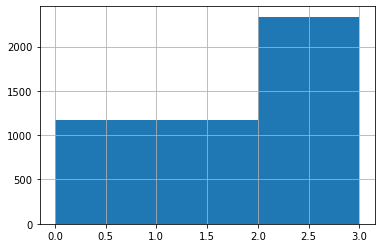

In [45]:
train_df['powerlabel'].hist(bins=np.unique(train_df['powerlabel']))

In [46]:
train_df[['crack', 'inactive']].value_counts()

crack  inactive
0      0           1168
       1           1168
1      0           1168
       1           1168
dtype: int64

<AxesSubplot:>

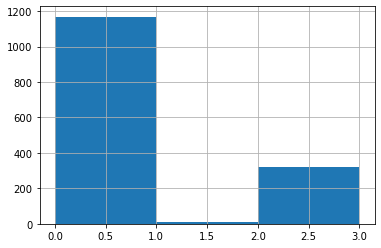

In [18]:
train_df['powerlabel'].hist(bins=np.unique(train['powerlabel']))